No cpu abnormalities detected


,Unnamed: 0,bucket,cpu,gcl,population,time,gcl delta,gcl delta avg,cpu abnormal,cpu avg
count,122.000000,122.0,122.000000,1.220000e+02,122.0,1.220000e+02,121.000000,22.000000,0.0,23.000000
mean,60.500000,10000.0,5.063434,1.008802e+06,12.0,4.652486e+06,9.834711,8.996364,NaN,5.118370
std,35.362409,0.0,2.803339,2.995843e+02,0.0,3.536241e+01,5.262045,0.057449,NaN,0.063265
min,0.000000,10000.0,2.569256,1.008199e+06,12.0,4.652426e+06,0.000000,8.930000,NaN,5.008001
25%,30.250000,10000.0,3.560184,1.008590e+06,12.0,4.652456e+06,3.000000,8.942500,NaN,5.081122
50%,60.500000,10000.0,4.140996,1.008839e+06,12.0,4.652486e+06,12.000000,8.990000,NaN,5.099930
75%,90.750000,10000.0,5.041717,1.008990e+06,12.0,4.652517e+06,13.000000,9.027500,NaN,5.165299
max,121.000000,10000.0,17.965282,1.009389e+06,12.0,4.652547e+06,17.000000,9.110000,NaN,5.244837


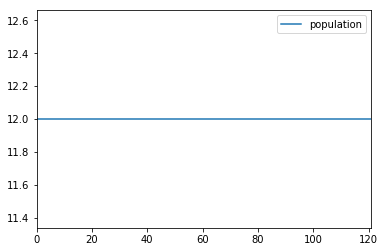

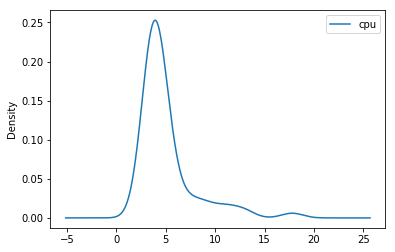

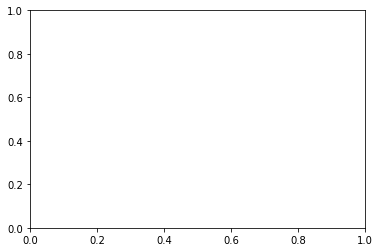

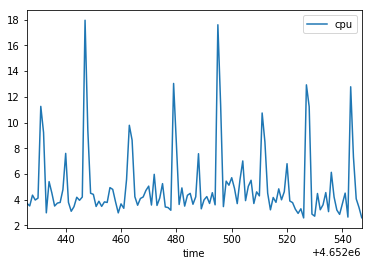

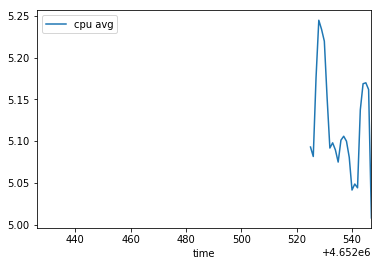

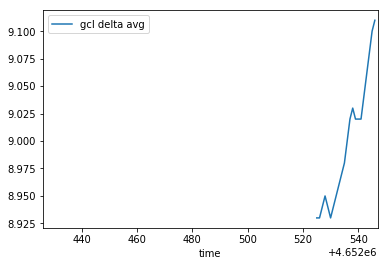

In [13]:
import fetch_stats as fs
import pandas as pd
import matplotlib.pyplot as plt

REFRESH_DATA = 0

if REFRESH_DATA:
    reports = fs.main()
    reports = [
        {
            **x,
            'gcl': x['gcl']['progress']
        }
        for x in reports
    ]
    df = pd.DataFrame(reports)
    df.to_csv("reports.csv")
else:
    df = pd.read_csv("reports.csv")
    
df['gcl delta'] = df['gcl'].diff().shift(-1)
df['gcl delta avg'] = df['gcl delta'].rolling(100).sum() / 100
df['cpu abnormal'] = df[df['cpu'] > 50]["cpu"]
df['cpu avg'] = df['cpu'].rolling(100).sum() / 100

df.plot(y="population")
df.plot.density(y="cpu")
try:
    df.plot.density(y="cpu abnormal")
except ValueError:
    print("No cpu abnormalities detected")
df.plot(x="time", y="cpu")
df.plot(x="time", y="cpu avg")
df.plot(x="time", y="gcl delta avg")
df.describe()